In [3]:
import pandas as pd
beer_df = pd.read_csv( 'beer.csv' )

In [4]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories', 
                                                'sodium', 
                                                'alcohol', 
                                                'cost']] )

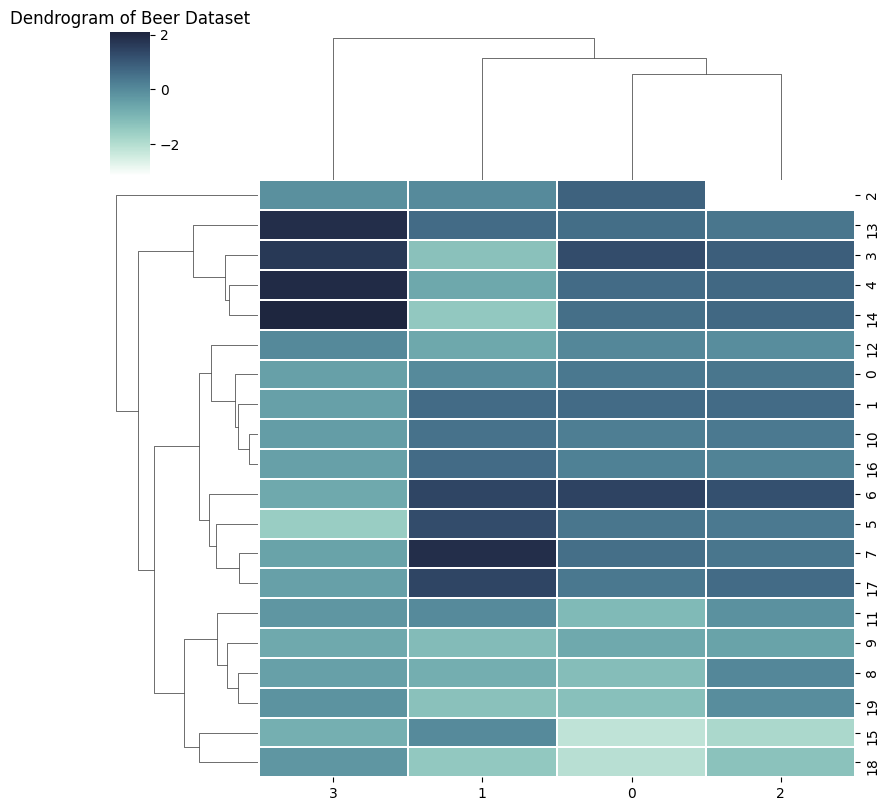

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2, 
              figsize = (8,8) );
plt.title("Dendrogram of Beer Dataset");

In [8]:
scaled_beer_df

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [9]:
beer_df.loc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


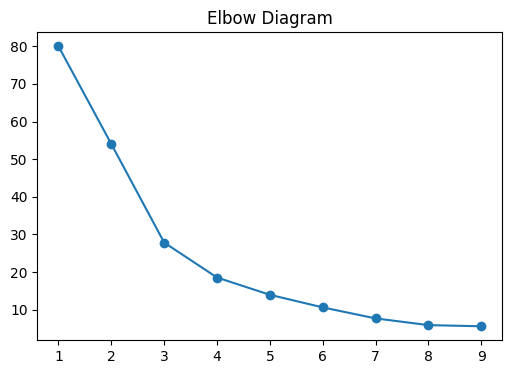

In [11]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Elbow Diagram");

In [12]:
beer_df.drop( index=[2], axis = 0, inplace = True)

In [13]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories', 
                                                'sodium', 
                                                'alcohol', 
                                                'cost']] )

In [14]:
k = 3

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

In [15]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [16]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [17]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2
